Load Libraries

In [1]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

: 

In [2]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
X_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(10000, 32, 32, 3)

In [3]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train = y_train.reshape(-1,)

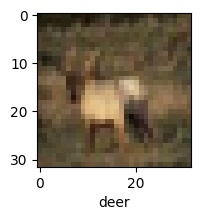

In [4]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train,y_train,3)

In [5]:
X_train = X_train/ 255
X_test = X_test / 255

In [6]:
cnn = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

cnn.fit(X_train,y_train, epochs = 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2747 - loss: 2.1759
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3897 - loss: 1.6948
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4345 - loss: 1.5888
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4539 - loss: 1.5350
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4658 - loss: 1.4873


In [7]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4399 - loss: 1.5254


[1.5390939712524414, 0.4413999915122986]

In [10]:
cnn = models.Sequential(
    [
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

cnn.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3695 - loss: 1.7072
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5983 - loss: 1.1526
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6492 - loss: 1.0063
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6850 - loss: 0.8952
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7178 - loss: 0.8250
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7356 - loss: 0.7703
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7523 - loss: 0.7186
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7628 - loss: 0.6764
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7766 - loss: 0.6367
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7891 - loss: 0.6064


In [11]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7143 - loss: 0.8892


[0.9078677892684937, 0.7049999833106995]